<a href="https://colab.research.google.com/github/Kamchatkina/sofaanka/blob/main/%22Adult_Cencsus_Income_Visualizations%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df = df.replace('?', 'unknown') #чистим данные
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unknown,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unknown,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,unknown,>50K


In [ ]:
df.isna().sum() #проверка на пропущенные столбцы

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
all_col = df.columns #название столбцов

cat_col = df.select_dtypes(exclude='number').columns #Создает список столбцов с категориальными данными (не числовыми).
num_col = df.select_dtypes(include='number').columns #Cоздает список с названиями всех числовых столбцов

label = 'income'
cat_col = [element for element in cat_col if element != label]
features = [element for element in df.columns if element != label]
df_org = df.copy()

In [ ]:
order_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
df[cat_col] = order_encoder.fit_transform(df[cat_col]) #заменяет категориальные данные числовыми
df[label] = label_encoder.fit_transform(df[label]) #преобразует столбец income в числовые данные

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8.0,77053,11.0,9,6.0,14.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,8.0,186061,15.0,10,6.0,14.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


<Axes: >

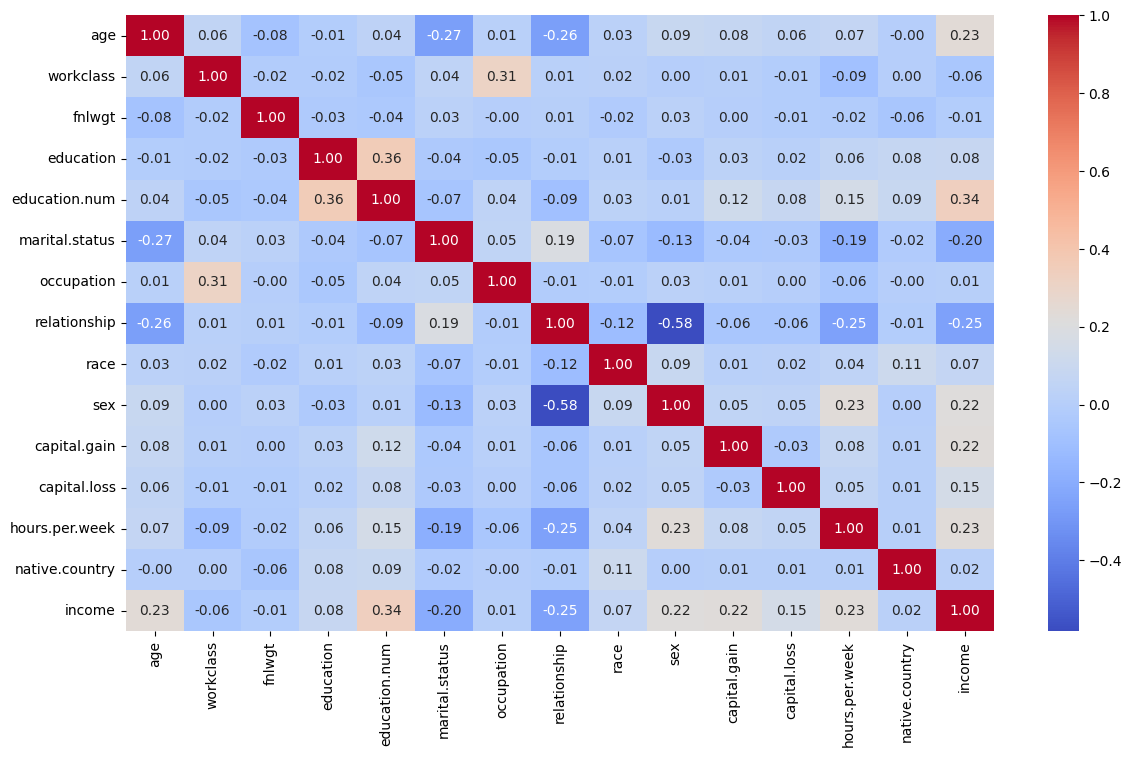

In [ ]:
#строим температурную диаграмму, чтобы увидеть корреляцию
corr = df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, fmt='.2f', annot=True, cmap='coolwarm')

Text(0, 0.5, 'Количество')

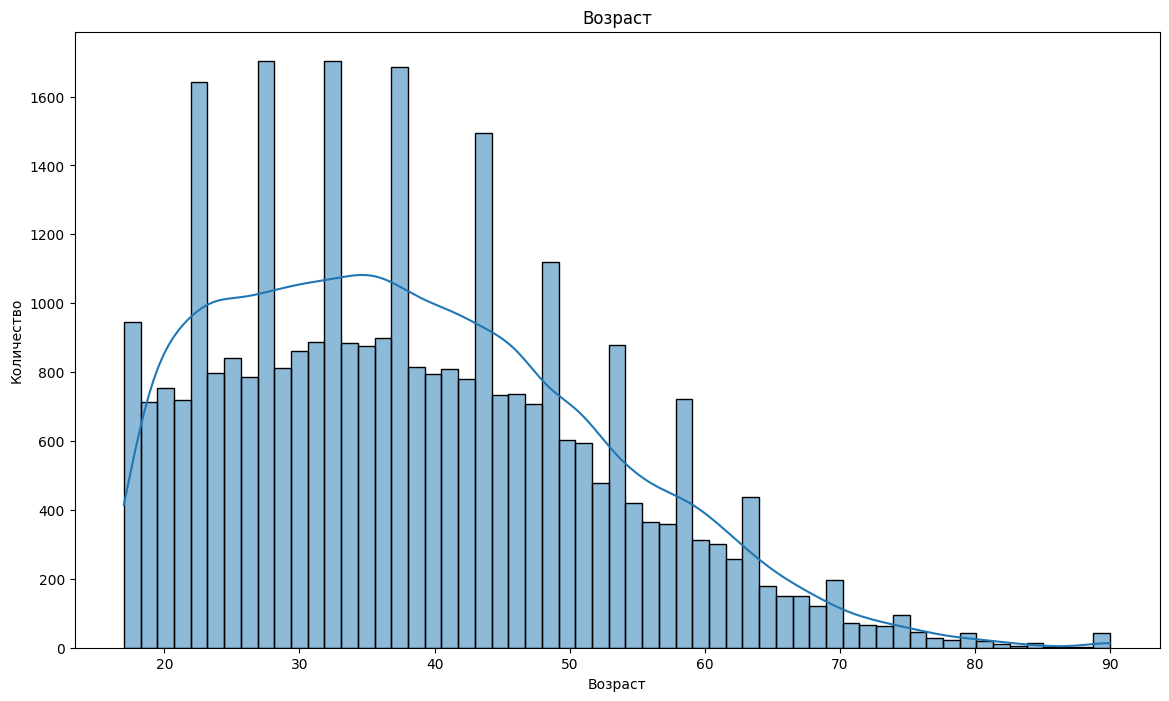

In [ ]:
#график, показывающий тенденцию возраста
plt.figure(figsize=(14,8))
sns.histplot(df['age'], kde=True)
plt.title('Возраст')
plt.xlabel('Возраст')
plt.ylabel('Количество')

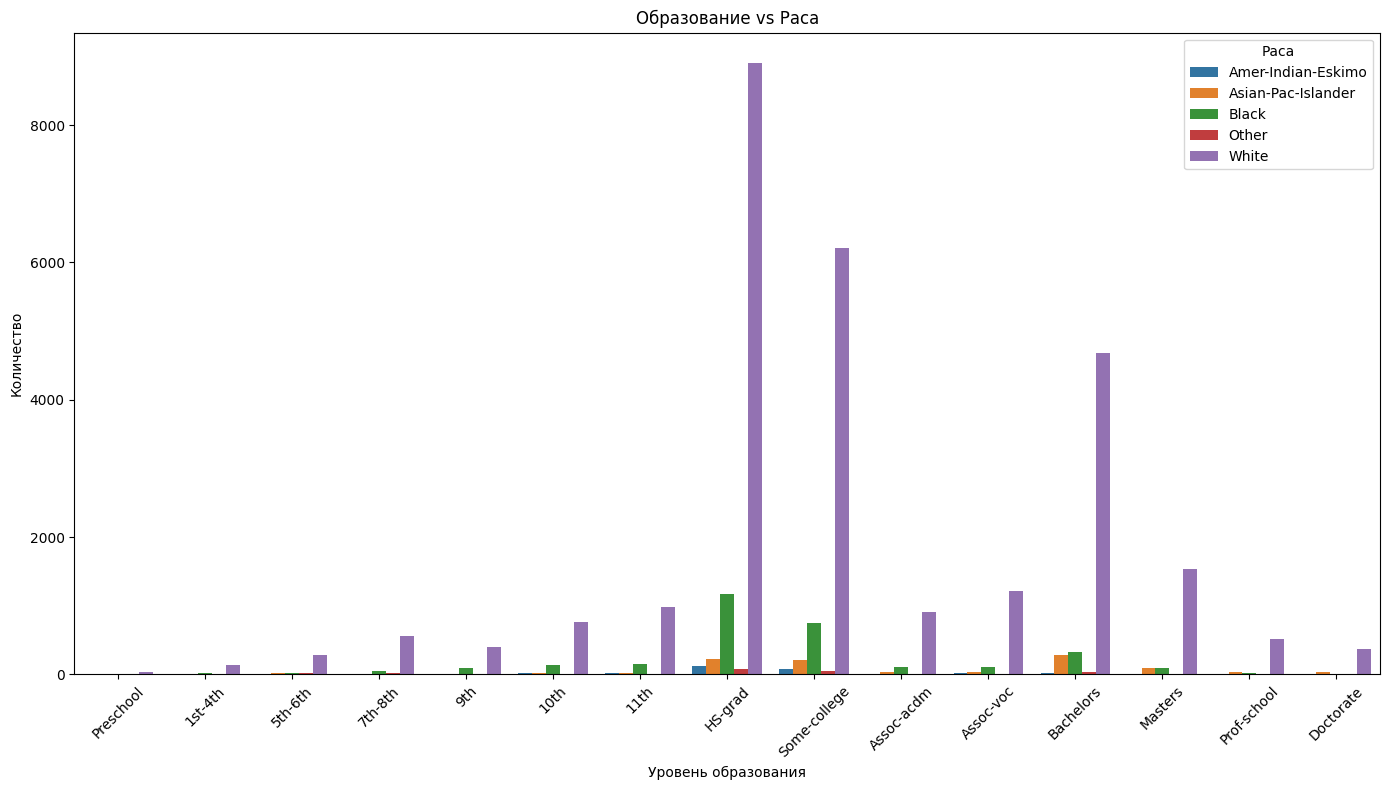

In [ ]:
df_plot = df_org.groupby(['education', 'race']).size().reset_index(name='count')

education_order = [
    'Preschool',      # Дошкольное образование
    '1st-4th',       # Начальное общее образование
    '5th-6th',       # Начальное общее образование
    '7th-8th',       # Основное общее образование
    '9th',           # Основное общее образование
    '10th',          # Основное общее образование
    '11th',          # Основное общее образование
    'HS-grad',       # Среднее общее образование
    'Some-college',  # Некоторое высшее образование
    'Assoc-acdm',    # Среднее профессиональное образование (академическое)
    'Assoc-voc',     # Среднее профессиональное образование (профессиональное)
    'Bachelors',      # Высшее образование (бакалавриат)
    'Masters',        # Высшее образование (магистратура)
    'Prof-school',    # Высшее образование (специалитет)
    'Doctorate'      # Высшее образование (аспирантура)
]

df_plot['education'] = pd.Categorical(df_plot['education'], categories=education_order, ordered=True)

# Строим график
plt.figure(figsize=(14, 8))
sns.barplot(data=df_plot, x='education', y='count', hue='race', order=education_order)
plt.xticks(rotation=45)
plt.title('Образование vs Раса')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Раса')
plt.tight_layout()
plt.show()


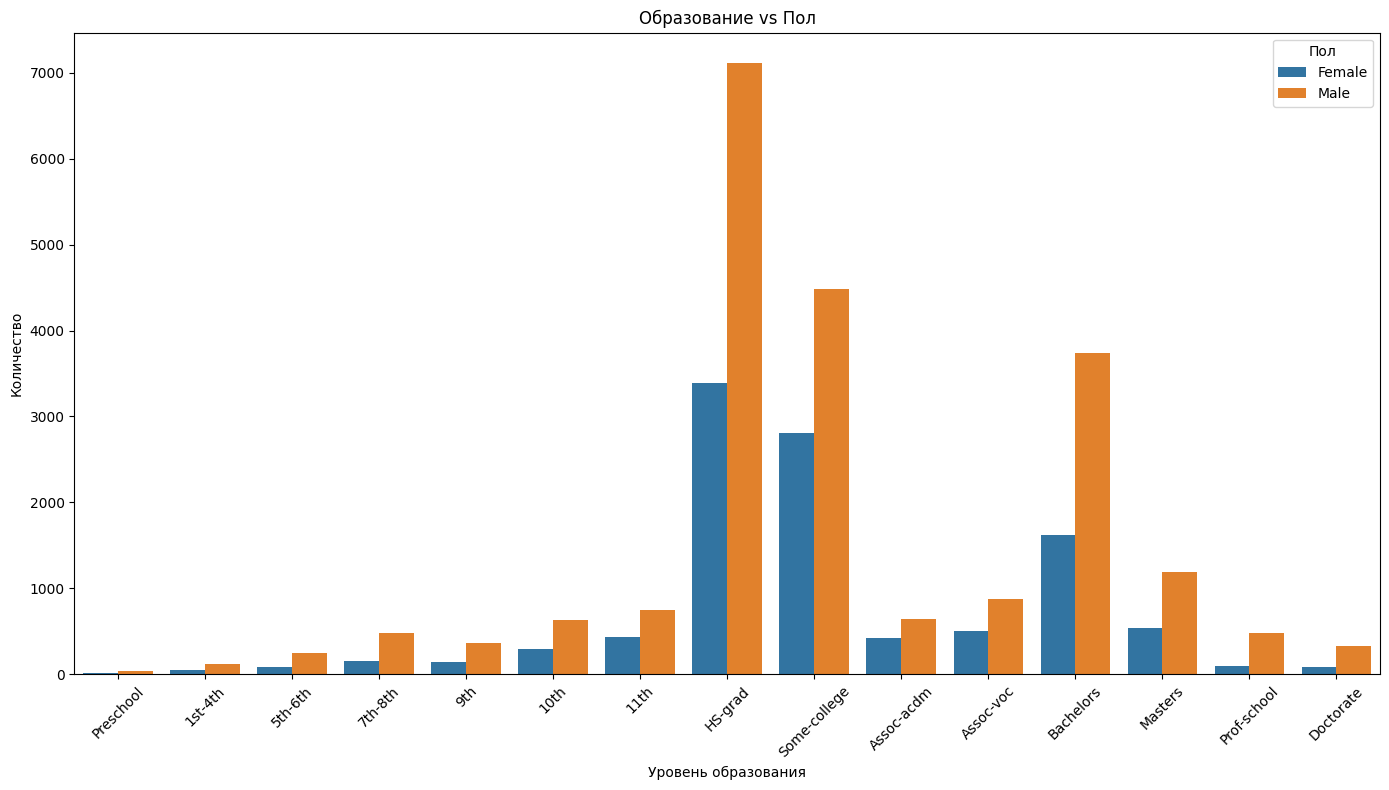

In [ ]:
df_plot = df_org.groupby(['education', 'sex']).size().reset_index(name='count')

education_order = [
    'Preschool',      # Дошкольное образование
    '1st-4th',       # Начальное общее образование
    '5th-6th',       # Начальное общее образование
    '7th-8th',       # Основное общее образование
    '9th',           # Основное общее образование
    '10th',          # Основное общее образование
    '11th',          # Основное общее образование
    'HS-grad',       # Среднее общее образование
    'Some-college',  # Некоторое высшее образование
    'Assoc-acdm',    # Среднее профессиональное образование (академическое)
    'Assoc-voc',     # Среднее профессиональное образование (профессиональное)
    'Bachelors',      # Высшее образование (бакалавриат)
    'Masters',        # Высшее образование (магистратура)
    'Prof-school',    # Высшее образование (специалитет)
    'Doctorate'      # Высшее образование (аспирантура)
]


df_plot['education'] = pd.Categorical(df_plot['education'], categories=education_order, ordered=True)

# Строим график
plt.figure(figsize=(14, 8))
sns.barplot(data=df_plot, x='education', y='count', hue='sex', order=education_order)
plt.xticks(rotation=45)
plt.title('Образование vs Пол')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()


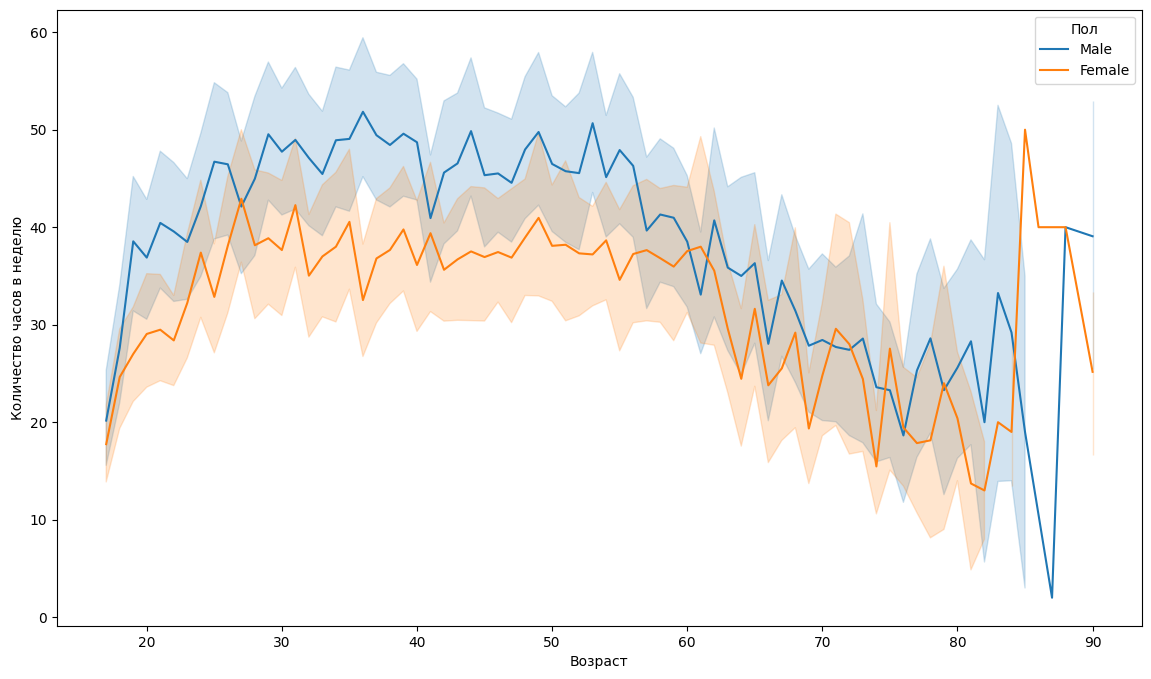

In [ ]:
age_hours_week = df_org[['hours.per.week', 'age', 'sex']].groupby('age').value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(data=age_hours_week, x='age', y='hours.per.week', hue='sex')
plt.xlabel('Возраст')
plt.ylabel('Количество часов в неделю')
plt.legend(title='Пол')


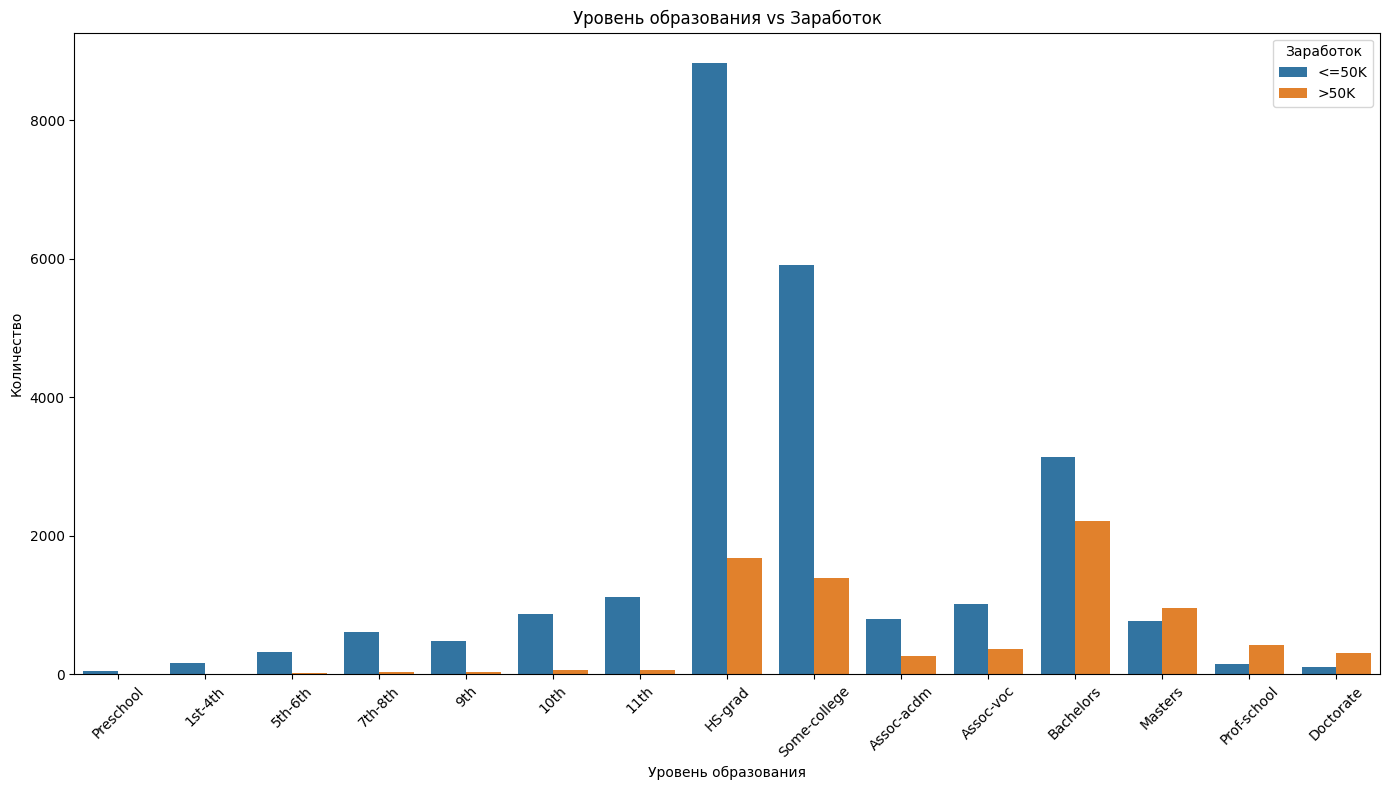

In [ ]:
df_plot = df_org.groupby(['education', 'income']).size().reset_index(name='count')

education_order = [
    'Preschool',      # Дошкольное образование
    '1st-4th',       # Начальное общее образование
    '5th-6th',       # Начальное общее образование
    '7th-8th',       # Основное общее образование
    '9th',           # Основное общее образование
    '10th',          # Основное общее образование
    '11th',          # Основное общее образование
    'HS-grad',       # Среднее общее образование
    'Some-college',  # Некоторое высшее образование
    'Assoc-acdm',    # Среднее профессиональное образование (академическое)
    'Assoc-voc',     # Среднее профессиональное образование (профессиональное)
    'Bachelors',      # Высшее образование (бакалавриат)
    'Masters',        # Высшее образование (магистратура)
    'Prof-school',    # Высшее образование (специалитет)
    'Doctorate'      # Высшее образование (аспирантура)
]


df_plot['education'] = pd.Categorical(df_plot['education'], categories=education_order, ordered=True)

# Строим график
plt.figure(figsize=(14, 8))
sns.barplot(data=df_plot, x='education', y='count', hue='income', order=education_order)
plt.xticks(rotation=45)
plt.title('Уровень образования vs Заработок')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Заработок')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Возраст vs Заработок')

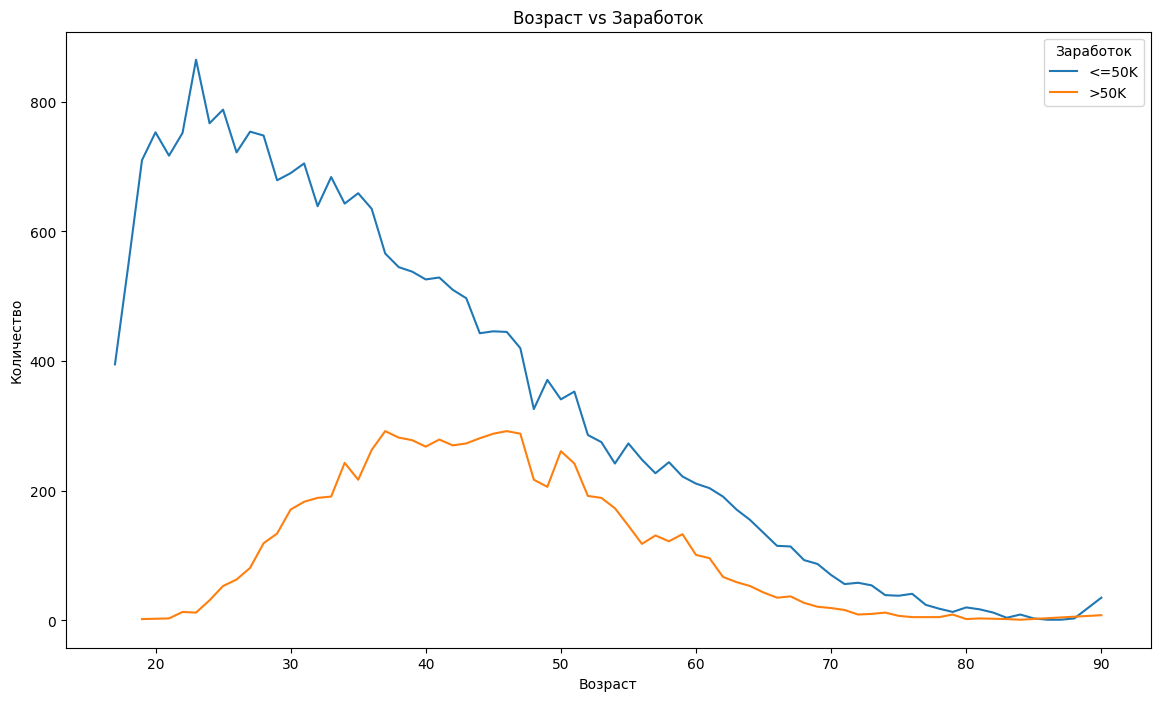

In [ ]:
age_hours_week = df_org[['income', 'age']].groupby('age').value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(data=age_hours_week, x='age', y='count', hue='income')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Заработок')
plt.title('Возраст vs Заработок')

In [ ]:
df_org['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [ ]:
df_org['relationship'] = df_org['relationship'].replace(
    {'Not-in-family':'Муж',
    'Unmarried':'Одинокий(ая)',
    'Other-relative':'Другие взаимоотношения',
    'Own-child':'Есть дети',
    'Husband':'Разведен(а)',
    'Wife':'Жена'})
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8.0,77053,11.0,9,6.0,14.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,8.0,186061,15.0,10,6.0,14.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


Text(0.5, 1.0, 'Семейный статус vs Заработок')

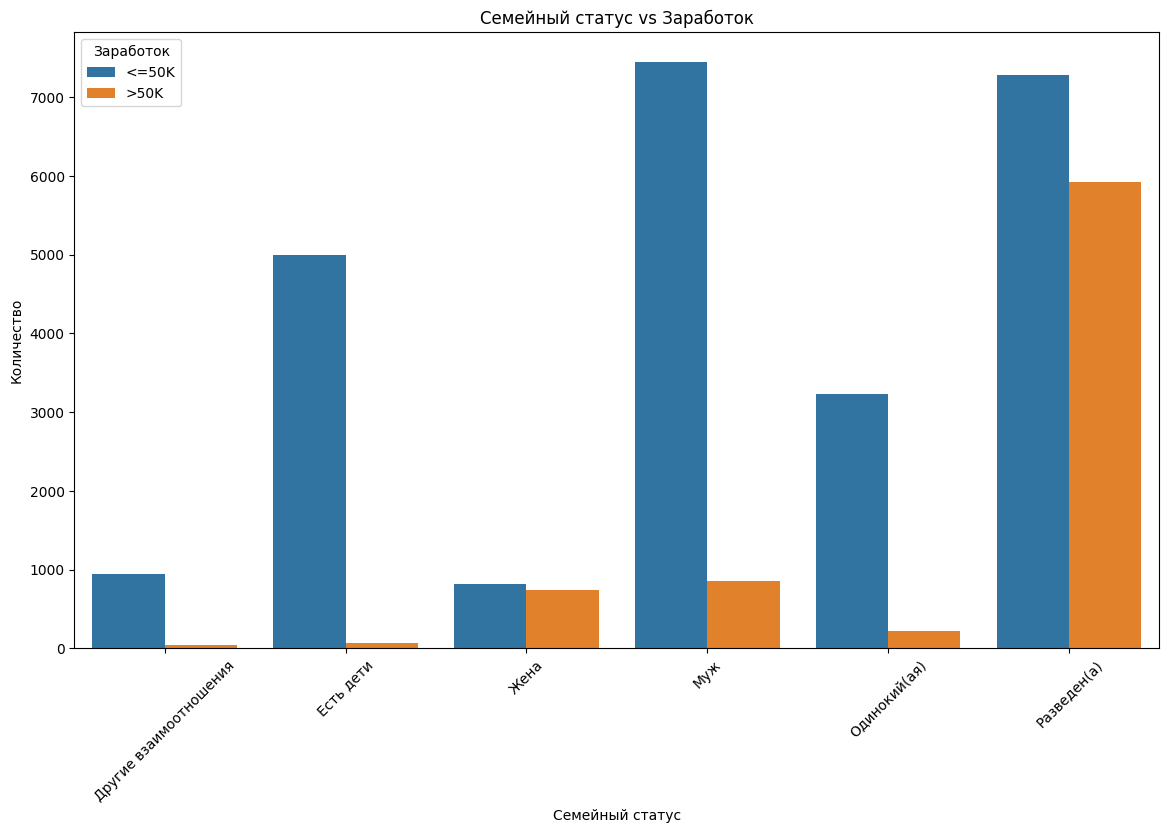

In [ ]:

income_education = df_org.groupby('relationship')[['relationship', 'income']].value_counts().reset_index()
income_education
plt.figure(figsize=(14,8))
sns.barplot(data=income_education, x='relationship', y='count', hue='income')
plt.xticks(rotation=45)
plt.xlabel('Семейный статус')
plt.ylabel('Количество')
plt.legend(title='Заработок')
plt.title('Семейный статус vs Заработок')

Text(0.5, 1.0, 'Количество часов в неделю vs Заработок')

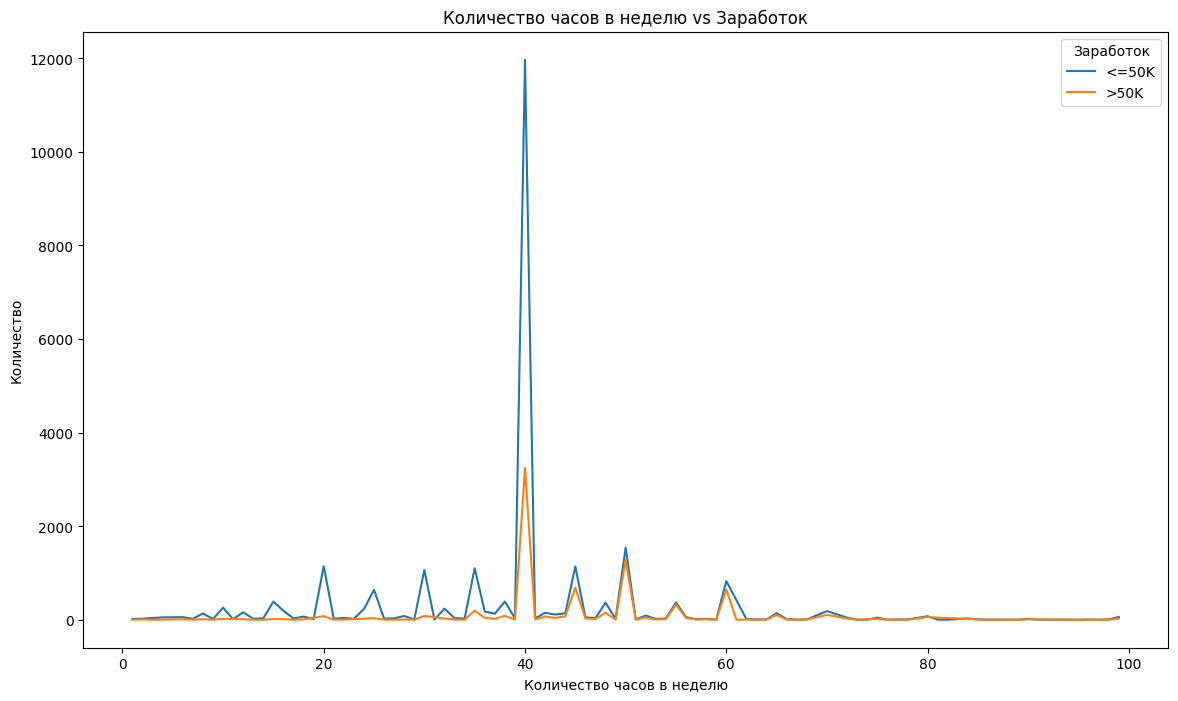

In [ ]:
age_hours_week = df_org[['income', 'hours.per.week']].groupby('hours.per.week').value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(data=age_hours_week, x='hours.per.week', y='count', hue='income')
plt.xlabel('Количество часов в неделю')
plt.ylabel('Количество')
plt.legend(title='Заработок')
plt.title('Количество часов в неделю vs Заработок')


In [ ]:
df_org['marital.status'] = df_org['marital.status'].replace(
    {'Widowed':'Овдовевший(ая)',
    'Divorced':'Разведенный(ая)',
    'Separated':'Разделенный',
    'Never-married':'Никогда не было брака',
    'Married-civ-spouse':'В браке с супругом',
    'Married-spouse-absent':'В браке без супруга',
    'Married-AF-spouse': 'В браке с военным'})
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8.0,77053,11.0,9,6.0,14.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,8.0,186061,15.0,10,6.0,14.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


In [ ]:
df_org['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

Text(0.5, 1.0, 'Семейное положение vs Заработок')

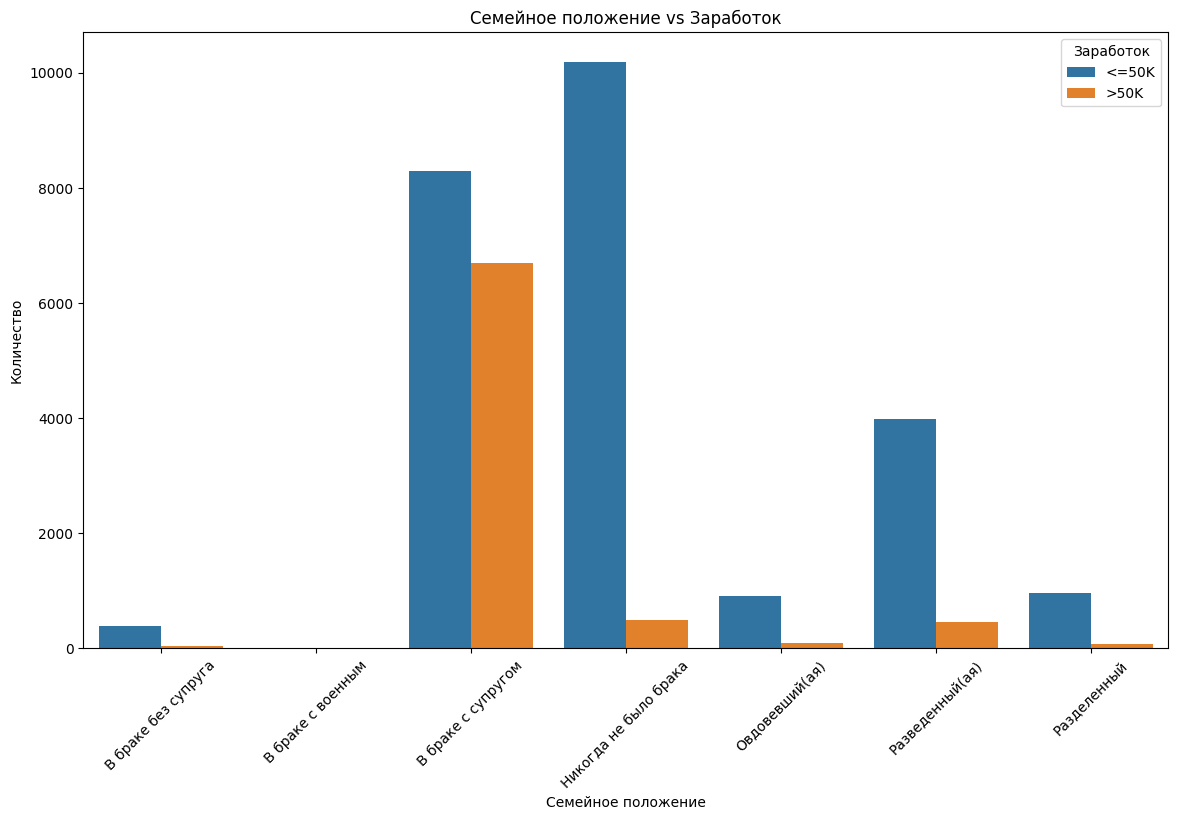

In [ ]:
income_education = df_org.groupby('marital.status')[['marital.status', 'income']].value_counts().reset_index()
income_education
plt.figure(figsize=(14,8))
sns.barplot(data=income_education, x='marital.status', y='count', hue='income')
plt.xticks(rotation=45)
plt.xlabel('Семейное положение')
plt.ylabel('Количество')
plt.legend(title='Заработок')
plt.title('Семейное положение vs Заработок')